# Extreme Gradient Boost


### Initialization

In [17]:

from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from utility import start
from utility import train
from utility import display


X_train, X_test, y_train, y_test, df = start("EncodedData.csv")
X_test.head()


,Height,Year,Club Goals,Club Goals Conceded,Goals,Assists,Red Cards,Yellow Cards,Minutes Played,Age,...,POS_LM,POS_LW,POS_RB,POS_RM,POS_RW,POS_SS,Club Value,Country Value,League Value,Position Value
98661,185.0,2020.75,25.0,29.0,0.0,0.0,0.0,3.0,1349.0,23,...,0,0,0,0,0,0,6.588353,6.551359,6.856290,6.656916
89472,189.0,2022.25,27.0,21.0,0.0,1.0,0.0,3.0,1350.0,28,...,0,0,0,0,0,0,6.916981,6.829705,6.753136,6.516244
115706,175.0,2022.25,1.0,4.0,0.0,0.0,0.0,0.0,87.0,22,...,0,0,1,0,0,0,6.191452,6.551359,6.326005,6.526637
49287,195.0,2018.25,16.0,22.0,0.0,0.0,0.0,1.0,1440.0,31,...,0,0,0,0,0,0,6.060772,6.536078,6.268469,6.516244
7423,189.0,2019.25,17.0,24.0,0.0,4.0,0.0,1.0,579.0,34,...,0,0,0,0,0,0,6.715108,6.856820,6.907649,6.737178


In [4]:

model = XGBRegressor(n_estimators=2000, max_depth=7, learning_rate = 0.25, random_state=42)
y_pred, y_pred_original, y_test_original = train(model, X_train, X_test, y_train, y_test)


Training Set Scores:
Mean Absolute Error (MAE): 0.36 M
Mean Absolute Percentage Error (MAPE): 9.72 %
R-squared (R^2): 0.99
Mean Squared Error (MSE): 935021.04 M

Test Set Scores:
Mean Absolute Error (MAE): 1.71 M
Mean Absolute Percentage Error (MAPE): 48.74 %
R-squared (R^2): 0.8
Mean Squared Error (MSE): 21737954.85 M


In [16]:
results, z = display(df, X_test, y_pred)
results

,Name,Year,Market Value,Predicted Value
34793,Neymar,2017.75,180000000.0,1.474180e+08
115380,Jude Bellingham,2023.75,180000000.0,2.759851e+08
24167,Eden Hazard,2019.25,150000000.0,1.254329e+08
97626,Kylian Mbappé,2018.25,150000000.0,4.149122e+07
56498,Harry Kane,2019.25,150000000.0,7.734352e+07
...,...,...,...,...
107772,Qingshen Zeng,2018.75,25000.0,9.960562e+04
115609,Sekou Sylla,2021.75,25000.0,3.991505e+05
102760,Tanaka Chinyahara,2016.25,25000.0,3.428926e+04
91119,Hasan Kurucay,2017.25,25000.0,1.930920e+05


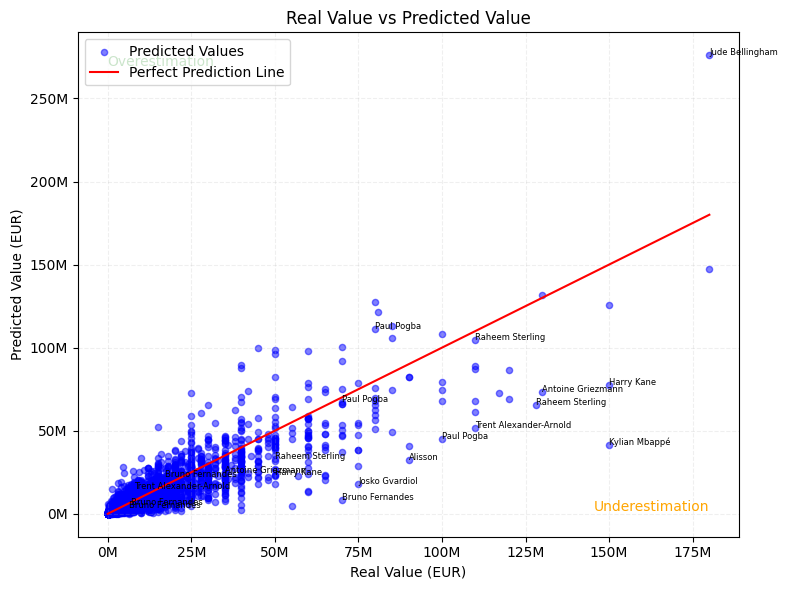

In [18]:
distances = np.abs(y_pred_original - y_test_original)
max_distance_indices = np.argsort(distances)[-10:]
furthest_names = z.iloc[max_distance_indices]['Name'].tolist()

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("Real Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("Real Value vs Predicted Value")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

for index, row in z.iterrows():
    if row['Name'] in furthest_names:
        plt.annotate(row['Name'], (row['Market Value'], row['Predicted Value']), fontsize=6, color='black')

def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()


20000000.0


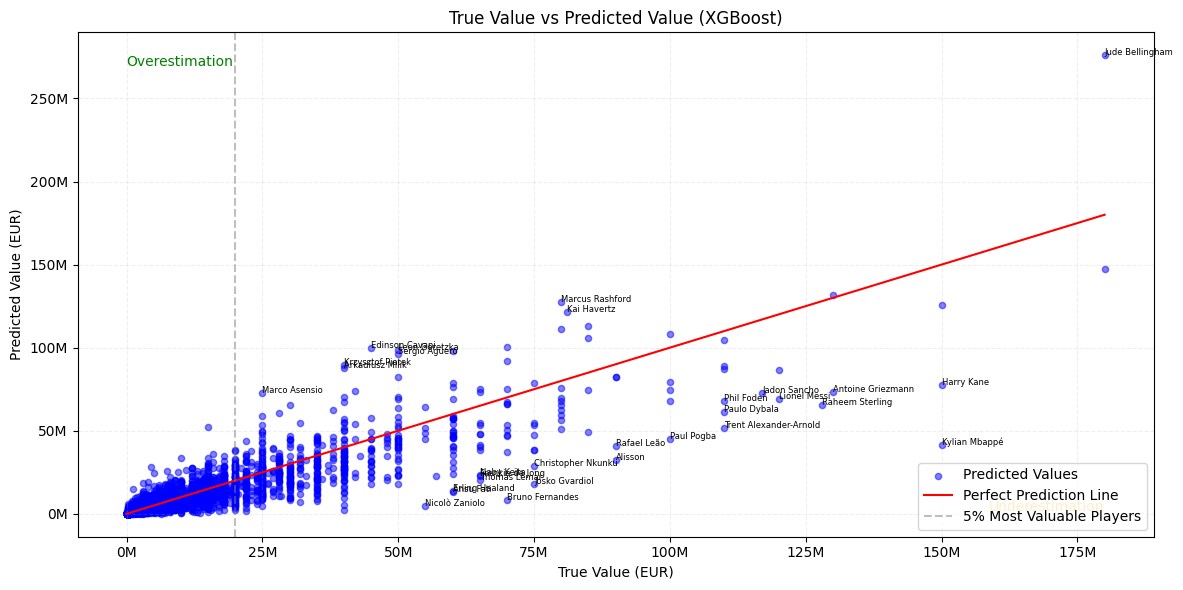

In [20]:
import numpy as np

# Calculate distances of each point from the optimal line
distances = np.abs(y_pred_original - y_test_original)

# Find the indices of points with maximum distances
max_distance_indices = np.argsort(distances)[-30:]  # Adjust the number to show more or fewer names

# Get the corresponding player names
furthest_names = z.iloc[max_distance_indices]['Name'].tolist()

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5, marker='o', label='Predicted Values')
plt.xlabel("True Value (EUR)")
plt.ylabel("Predicted Value (EUR)")
plt.title("True Value vs Predicted Value (XGBoost)")
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', label='Perfect Prediction Line')
plt.text(min(y_test_original), max(y_pred_original), "Overestimation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Underestimation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Annotate only the furthest points
for index in max_distance_indices:
    row = z.iloc[index]
    plt.annotate(row['Name'], (row['Market Value'], row['Predicted Value']), fontsize=6, color='black')

# Set formatter for x-axis and y-axis
def millions_formatter(x, pos):
    return f'{x / 1000000:.0f}M'

# Identify the 1% most valuable players
top_1_percent = z.nlargest(int(len(z) * 0.05), 'Market Value')
top_1_percent = top_1_percent.sort_values(by='Market Value')
lowest_value_player = top_1_percent.iloc[0]['Market Value']
# Add vertical line for the 1% most valuable players
print(lowest_value_player)
plt.axvline(x=lowest_value_player, color='gray', linestyle='--', label='5% Most Valuable Players', alpha=0.5)
    
formatter = FuncFormatter(millions_formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(alpha=0.2, linestyle='--', zorder=1)
plt.legend()
plt.tight_layout()
plt.show()
